<a href="https://colab.research.google.com/github/IMPRIME17/Computer-Vision-Projects/blob/master/Nuralnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.datasets import mnist
from keras.layers import Flatten
from keras.layers import Dropout
from keras.models import Model
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
import random
import matplotlib.image as mpimg

In [0]:
np.random.seed(0)

In [0]:
data = mnist.load_data()

In [0]:
len(data[0])

2

In [0]:
(x_train, y_train),(x_test, y_test) = data

In [0]:
len(x_train)

60000

In [0]:
len(x_test)

10000

5

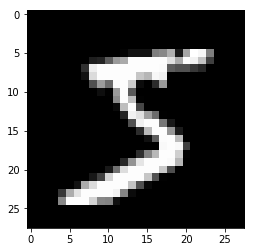

In [0]:
plt.imshow(x_train[0], cmap= 'gray')
y_train[0]

In [0]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253
  159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252
  252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239
  233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202
   84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 163 252 252 252 25

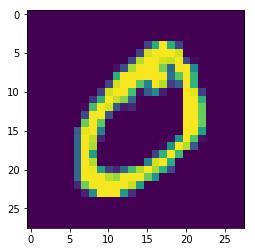

In [0]:
plt.imshow(x_train[1])
print(x_train[1])

In [0]:
num_of_samples=[]
cols = 5
num_classes = 10

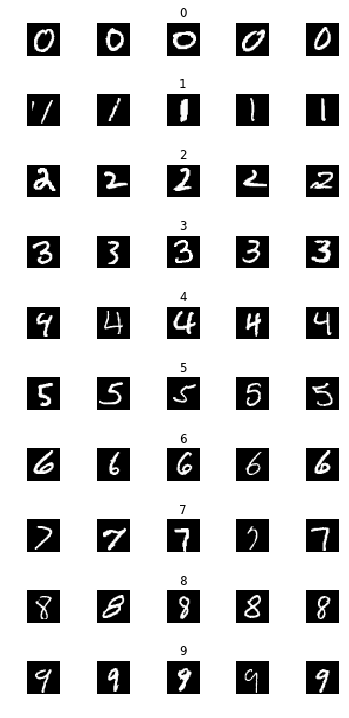

In [0]:
fig, axs = plt.subplots(nrows= num_classes, ncols=cols, figsize= (5,10))
fig.tight_layout()
for i in range(cols):
  for j in range(num_classes):
    x_selected = x_train[y_train== j]
    axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected)-1)), :, :], cmap=plt.get_cmap('gray'))
    axs[j][i].axis('off')
    if i == 2:
      axs[j][i].set_title(str(j))
      num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


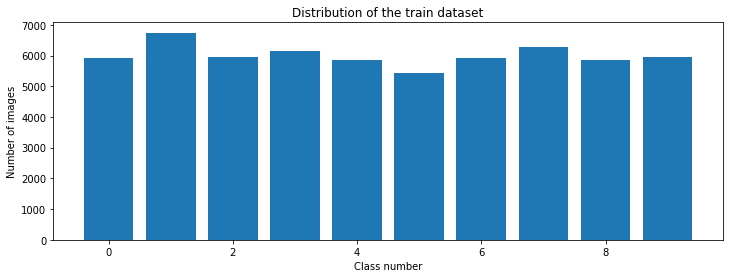

In [0]:
print(num_of_samples)
plt.figure(figsize=(12,4))
plt.bar(range(num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

In [0]:
x_train.shape

(60000, 28, 28)

In [0]:
x_train= x_train.reshape(-1,28,28,1)
x_test= x_test.reshape(-1,28,28,1)

In [0]:
y_train= to_categorical(y_train, 10)
# y_train= to_categorical(y_test, 10)


In [0]:
y_train[0][0]

0.0

In [0]:
x_train = x_train/255
x_test = x_test/255

In [0]:

y_train.shape

(60000, 10)

In [0]:
y_test.shape


(10000,)

In [0]:
def le_net():
  model = Sequential()
  model.add(Conv2D(30,(5,5), input_shape=(28,28,1), activation = 'relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(15,(3,3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Flatten())
  model.add(Dense(500,activation="relu"))
  model.add(Dropout(0.5))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes,activation="softmax"))
  model.compile(Adam(lr=0.001),loss ='categorical_crossentropy', metrics=['accuracy'])
  return model

# New Section

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
lenet = le_net()


In [0]:
lenet.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 15)        4065      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 15)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 375)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 500)               188000    
_________________________________________________________________
dropout_3 (Dropout)          (None, 500)               0         
__________

In [0]:
history= lenet.fit(X_train,y_train, epochs=20, validation_split= 0.1, batch_size=400,verbose=1,shuffle=1)

NameError: ignored

In [0]:
lenet.save('digit.h5')

In [0]:
!ls

digit.h5  sample_data


In [0]:
from google.colab import files

In [0]:
files.download('digit.h5')

Text(0.5, 0, 'epoch')

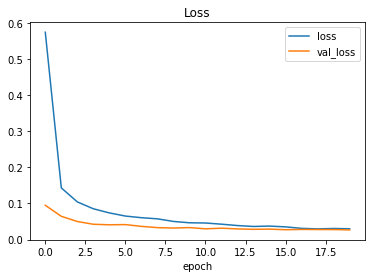

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

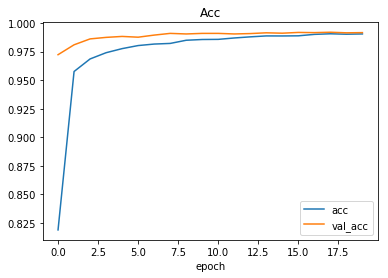

In [0]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['acc','val_acc'])
plt.title('Acc')
plt.xlabel('epoch')


In [0]:
import requests
from PIL import Image
# https://kx.com/images/03_IMAGES/160520-8.png
url = "https://kx.com/images/03_IMAGES/160520-8.png"
response = requests.get(url,stream=True)
img = Image.open(response.raw).convert("L")
plt.imshow(img,cmap="gray")

NameError: ignored

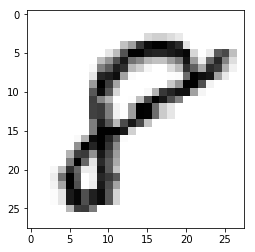

In [0]:
import cv2
img_array = np.asarray(img)
res = cv2.resize(img_array,(32,32))
plt.imshow(res,cmap="gray")

In [0]:
res = res/255
res = res.reshape(1,28,28,1)
lenet.predict_classes(res)
# lenet.predict(res)

array([8])